In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import euclidean_distances

In [71]:
blob_a = 1.5 * np.random.rand(10,2)
blob_a[:, 0] += 4
blob_b = 1.5 * np.random.rand(10,2)
blob_b[:, 0] += 10
blob_c = 1.5 * np.random.rand(30,2)
blob_c[:, 0] += 5
blob_c[:, 1] += 5

data = np.concatenate((blob_a, blob_b, blob_c), axis=0)
num_points = data.shape[0]

(0.0, 10.0)

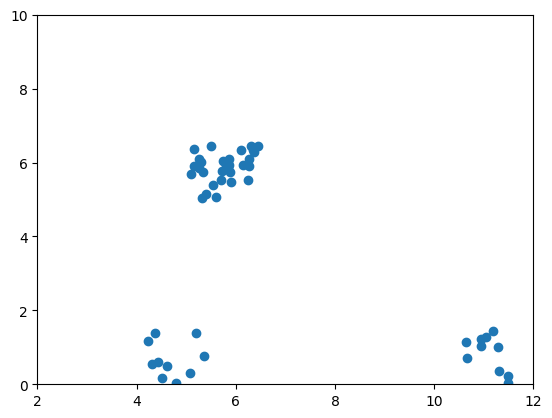

In [72]:
plt.scatter(data[:,0], data[:,1])
plt.xlim([2, 12])
plt.ylim([0, 10])

In [78]:
eps = 1.0
n_samples = 3
dbscan = DBSCAN(eps=eps, min_samples=n_samples)
labels_sklearn = dbscan.fit_predict(data)

In [76]:
core_points = -1 * np.ones((num_points,)).astype(int)
for i in range(num_points):
    distances = euclidean_distances(data, [data[i, :]]).reshape(num_points,)
    nbrs = (distances < eps).nonzero()[0]
    if nbrs.shape[0] >= n_samples:
        for nbr in nbrs:
            if core_points[nbr] == -1 or core_points[nbr] == nbr:
                core_points[nbr] = i

labels = np.arange(num_points)
labels[core_points == -1] = -1
converged = False
num_iterations = 0
while not converged:
    num_iterations += 1
    converged = True
    for i in range(num_points):
        if labels[i] == -1:
            continue
        current_core_idx = core_points[i]
        if labels[i] < labels[current_core_idx]:
            labels[current_core_idx] = labels[i]
            converged = False
        elif labels[i] > labels[current_core_idx]:
            labels[i] = labels[current_core_idx]
            converged = False

print(f"Converged in {num_iterations} iterations")

Converged in 2 iterations


In [80]:
print(np.bincount(labels_sklearn))
print(np.bincount(labels))

[10 10 30]
[10  0  0  0  0  0  0  0  0  0 10  0  0  0  0  0  0  0  0  0 30]
